In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [93]:
stats = pd.read_csv("stats.csv")
stats

,G,Tm,Opp,Outcome,MP,FG,FGA,FG%,3P,3PA,...,+/-,DEF RTG,DREB,DREB%,STL.1,BLK.1,PTS OFF TOV,2ND CH PTS,OPP PTS FB,OPP PTS PAINT
0,1,DAL,SAS,W (+7),34:14:00,13,25,0.520,3,11,...,4,118.5,33.2,71.2,7.1,5.9,16.8,14.9,14.2,52.3
1,2,DAL,BRK,W (+5),36:02:00,16,25,0.640,9,14,...,9,117.2,33.8,71.9,6.5,5.5,14.8,14.1,14.6,46.2
2,3,DAL,MEM,W (+15),40:00:00,11,22,0.500,6,12,...,6,112.8,32.7,71.3,7.4,6.3,17.4,14.2,13.2,46.0
3,4,DAL,CHI,W (+9),40:03:00,5,16,0.313,1,8,...,11,113.9,31.9,70.5,8.0,4.9,14.6,14.1,13.7,44.3
4,5,DAL,DEN,L (-11),38:16:00,11,24,0.458,6,11,...,-4,113.2,32.9,71.2,7.2,5.4,16.7,12.5,13.8,49.8
5,6,DAL,CHO,W (+6),36:25:00,8,19,0.421,1,9,...,3,120.9,30.4,69.8,6.5,4.9,17.9,14.7,14.2,53.1
6,7,DAL,ORL,W (+15),35:09:00,9,17,0.529,5,10,...,7,111.2,32.7,73.1,8.3,5.5,17.0,12.8,14.9,49.4
7,8,DAL,TOR,L (-11),38:24:00,11,26,0.423,2,10,...,-7,116.3,32.7,71.6,7.4,4.9,16.3,14.5,13.7,52.5
8,9,DAL,LAC,W (+18),31:41:00,17,21,0.810,6,9,...,32,113.3,32.9,70.7,8.2,5.2,15.7,14.1,14.3,47.7
9,10,DAL,NOP,W (+12),27:59:00,11,18,0.611,4,9,...,14,111.4,33.6,71.6,8.3,4.9,16.3,13.8,13.3,47.7


In [94]:
stats = stats[['G', 'Tm', 'Opp','PTS','DEF RTG','DREB',	'DREB%','STL.1', 'BLK.1', 'PTS OFF TOV', '2ND CH PTS', 'OPP PTS FB', 'OPP PTS PAINT']]
stats

,G,Tm,Opp,PTS,DEF RTG,DREB,DREB%,STL.1,BLK.1,PTS OFF TOV,2ND CH PTS,OPP PTS FB,OPP PTS PAINT
0,1,DAL,SAS,33,118.5,33.2,71.2,7.1,5.9,16.8,14.9,14.2,52.3
1,2,DAL,BRK,49,117.2,33.8,71.9,6.5,5.5,14.8,14.1,14.6,46.2
2,3,DAL,MEM,35,112.8,32.7,71.3,7.4,6.3,17.4,14.2,13.2,46.0
3,4,DAL,CHI,18,113.9,31.9,70.5,8.0,4.9,14.6,14.1,13.7,44.3
4,5,DAL,DEN,34,113.2,32.9,71.2,7.2,5.4,16.7,12.5,13.8,49.8
5,6,DAL,CHO,23,120.9,30.4,69.8,6.5,4.9,17.9,14.7,14.2,53.1
6,7,DAL,ORL,29,111.2,32.7,73.1,8.3,5.5,17.0,12.8,14.9,49.4
7,8,DAL,TOR,31,116.3,32.7,71.6,7.4,4.9,16.3,14.5,13.7,52.5
8,9,DAL,LAC,44,113.3,32.9,70.7,8.2,5.2,15.7,14.1,14.3,47.7
9,10,DAL,NOP,30,111.4,33.6,71.6,8.3,4.9,16.3,13.8,13.3,47.7


In [95]:
# Assuming 'data' is your DataFrame
selected_features = ['DEF RTG', 'DREB',	'DREB%', 'STL.1', 'BLK.1', 'PTS OFF TOV', '2ND CH PTS', 'OPP PTS FB', 'OPP PTS PAINT']
X = stats[selected_features]
y = stats['PTS']


In [96]:
# Assuming 'data_sorted' is your DataFrame
X_train = stats.iloc[:25][selected_features]
y_train = stats.iloc[:25]['PTS']

X_test = stats.iloc[25:][selected_features]
y_test = stats.iloc[25:]['PTS']


In [97]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [98]:
y_pred = model.predict(X_test)

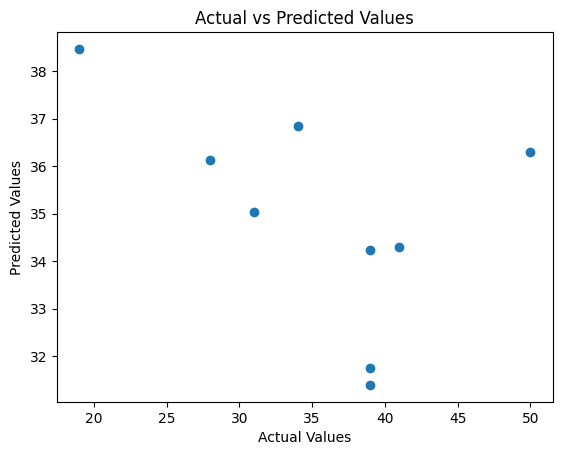

In [99]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [100]:
for i in range(9):  # Display the first 10 predictions
    print(f'Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}')


Actual: 28, Predicted: 36.134857142857136
Actual: 39, Predicted: 34.235
Actual: 50, Predicted: 36.297000000000004
Actual: 39, Predicted: 31.390166666666666
Actual: 39, Predicted: 31.736499999999996
Actual: 19, Predicted: 38.4725
Actual: 41, Predicted: 34.30485714285714
Actual: 34, Predicted: 36.83833333333333
Actual: 31, Predicted: 35.03666666666666
